### ==========================================================
### Les modules de travail
### ==========================================================

In [123]:
import pandas as pd
import pandas.plotting
from pandas.plotting import scatter_matrix
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from matplotlib import animation
from matplotlib.animation import FuncAnimation,FFMpegFileWriter
from mpl_toolkits.mplot3d import Axes3D

### ===============================================================
###  Declaration du dossier de travail
### ===============================================================

In [361]:
import os
base= r'C:\Users\Jéros\Titanic ML\input'
base=base.replace('\\','/')
os.chdir(base)

### ===============================================================
### importation des  données 
### ===============================================================

In [362]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

In [363]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

### ===============================================================
### Vérification des  données 
### ===============================================================

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ===============================================================
### Analyse de la forme des données de train
### ===============================================================

In [132]:
df=train.copy()
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [133]:
print(df.shape)

(891, 12)


int64      5
object     5
float64    2
dtype: int64


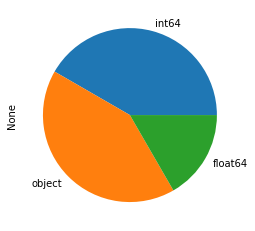

In [134]:
print(df.dtypes.value_counts())
df.dtypes.value_counts().plot.pie()

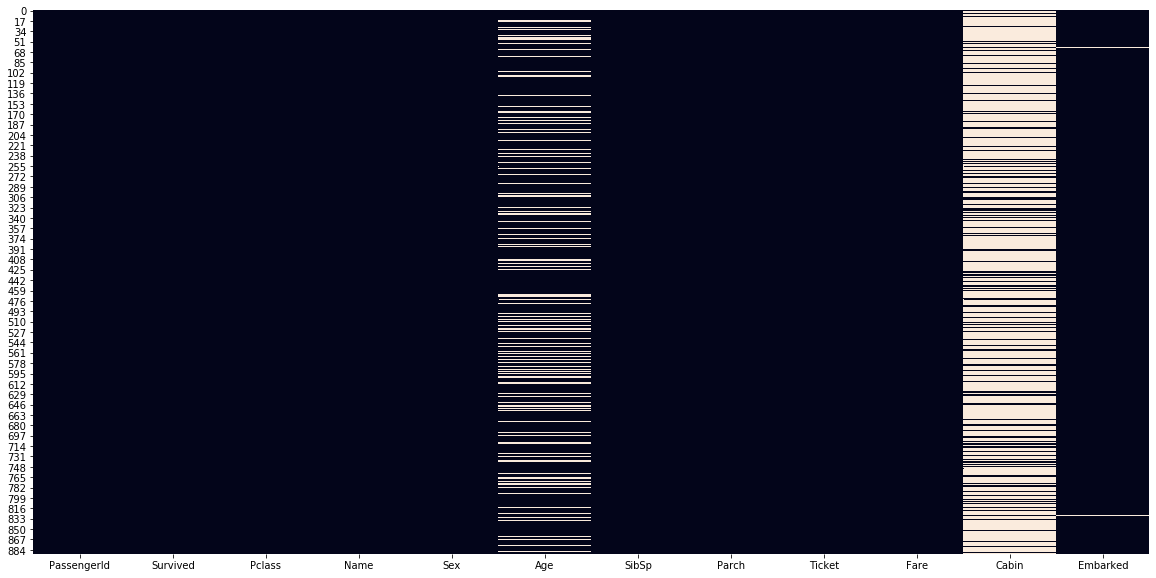

In [135]:
df.isna()
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [137]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

#### Analyse de la forme de train

  - **variable target (variable à expliquer)** : Survived
  - **linges et colonnes** :891, 12
  - **types de variables (variables explicatives)**: quantitatives :7 , qualitatives : 5
 - **Analyse des valeurs manquantes** :
    - beaucoup de NaN concernant les variables age avec un taux de 19,86% et Cabin un taux  de 77%

### ===============================================================
### Analyse du fond
### ===============================================================

### Examen de la colonne target (variable à expliquer)

In [138]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [139]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### Histogramme des variables quantitatives continues

In [140]:
df.select_dtypes('float').columns

Index(['Age', 'Fare'], dtype='object')

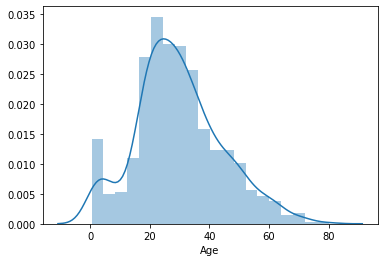

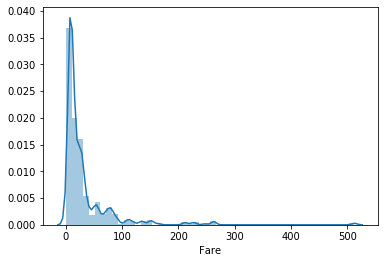

In [141]:
for col in df.select_dtypes('float'):
    #print(col)
    plt.figure()
    sns.distplot(df[col])

### Diagramme en barres des variables qualitatives (Treemap)

In [142]:
df.select_dtypes('int64').columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [143]:
df.select_dtypes('object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

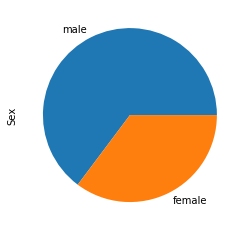

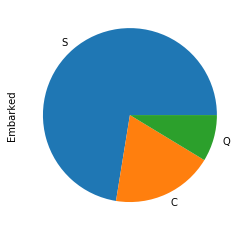

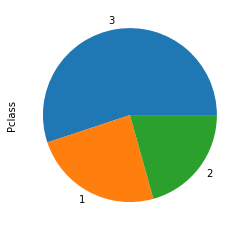

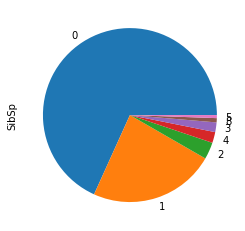

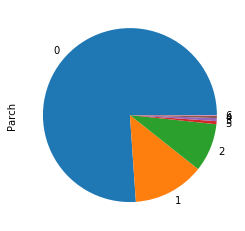

In [144]:
for col in df[['Sex','Embarked','Pclass', 'SibSp', 'Parch']]:
    plt.figure()
    df[col].value_counts().plot.pie()

## Relation entre Target / Variables (quali * quanti) & (quali * quali)

#### Création de sous-ensembles positifs  et négatifs

In [33]:
survivant_df=df[df['Survived']==1]

In [34]:
decedes_df=df[df['Survived']==0]

### Target / float (quali * quanti / histogramme ou Boxplot)

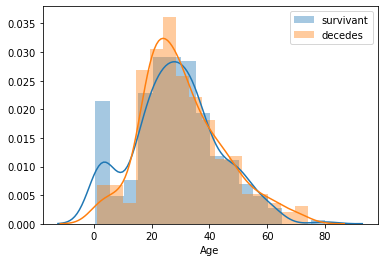

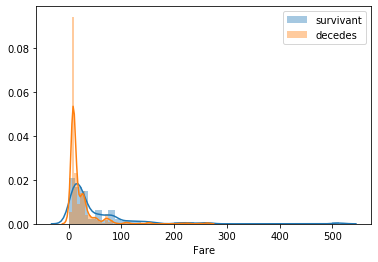

In [35]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(survivant_df[col], label='survivant')
    sns.distplot(decedes_df[col], label='decedes')
    plt.legend()

### Relation Target / age

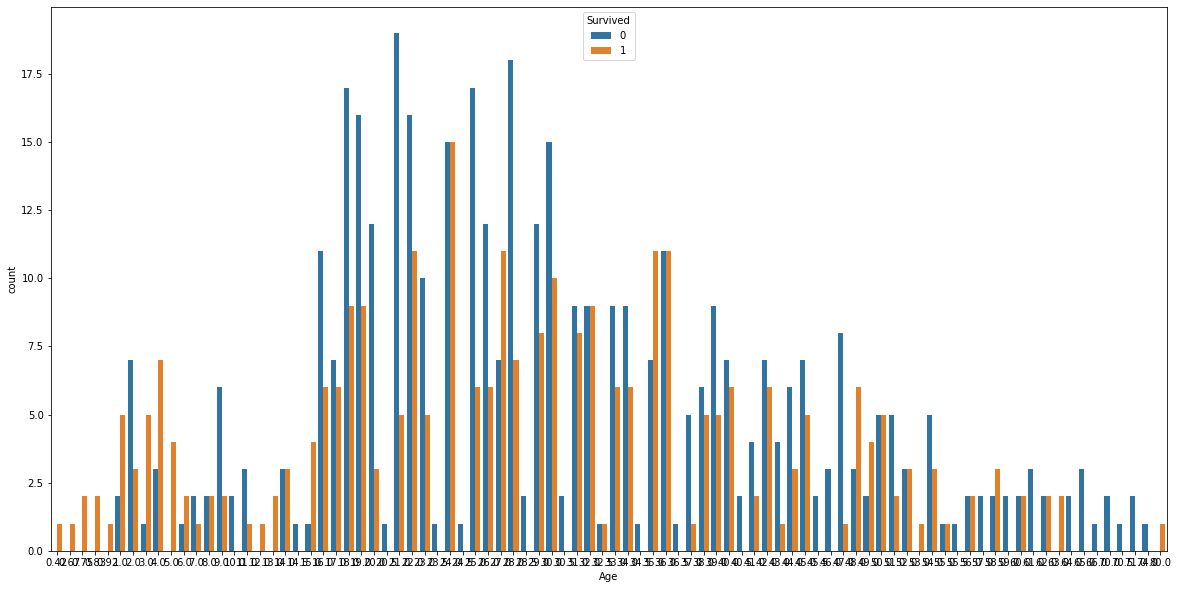

In [145]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Survived', data=df)

(0, 80.0)

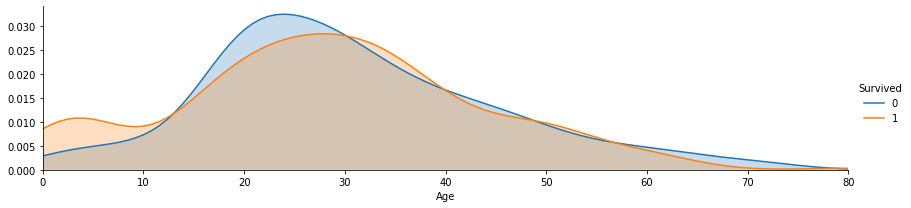

In [146]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(0)

### Relation Target / Pclass

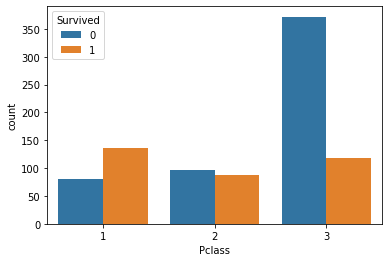

In [148]:
sns.countplot(x='Pclass',hue='Survived', data=df)

### Relation Target / Sibsp

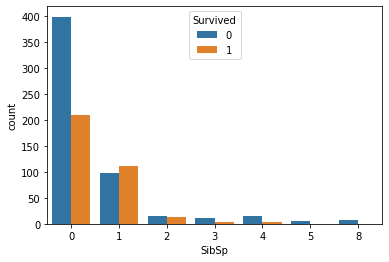

In [149]:
sns.countplot(x='SibSp',hue='Survived', data=df)

### Relation Target / Parch

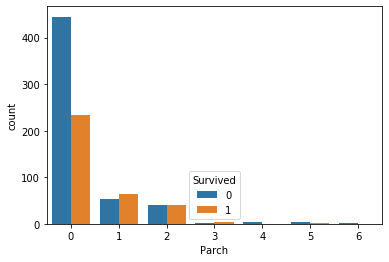

In [150]:
sns.countplot(x='Parch',hue='Survived', data=df)

### Relation Target / Sex  (quali * quali / table de contingence)

In [151]:
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


### Relation Target / Embarked  (quali * quali / table de contingence)

In [152]:
pd.crosstab(df['Survived'],df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


### Table de contingence

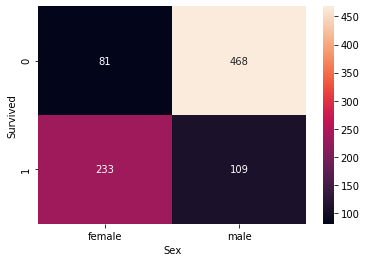

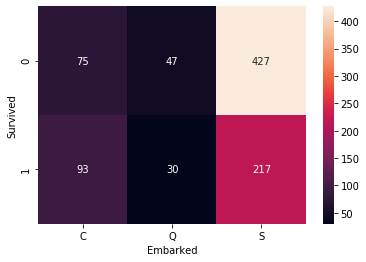

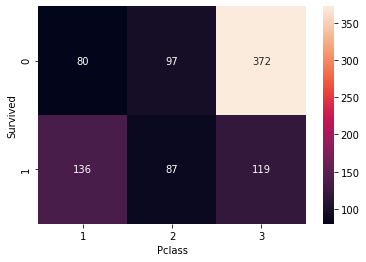

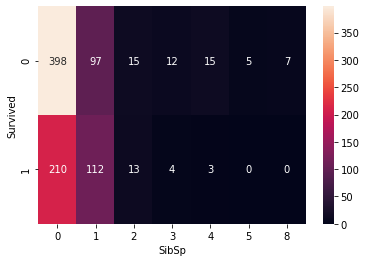

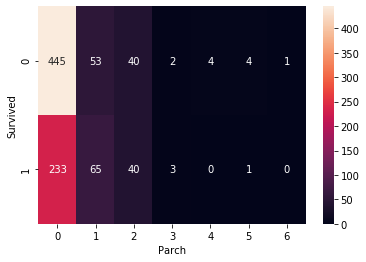

In [153]:
for col in df[['Sex','Embarked','Pclass', 'SibSp', 'Parch']]:
        plt.figure()
        sns.heatmap(pd.crosstab(df['Survived'],df[col]),annot=True,fmt='d')

### Relations  (quanti * quanti)

In [154]:
import researchpy as rp
corr_type, corr_matrix, corr_ps = rp.corr_case(df.select_dtypes('float'))
print(corr_type)

  Pearson correlation test using list-wise deletion
0                     Total observations used = 714


In [155]:
corr_matrix

,Age,Fare
Age,1,0.0961
Fare,0.0961,1


In [156]:
corr_ps

,Age,Fare
Age,0.0000,0.0102
Fare,0.0102,0.0000


# PRE-PROCESSING

In [400]:
df_train = train.copy()
df_test = test.copy()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## TrainTest - Nettoyage - Encodage

#### name

In [401]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)# tout stringaccompagné de point(.)
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)# tout stringaccompagné de point(.)
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Mme           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Countess      1
Sir           1
Name: Title, dtype: int64

In [402]:
def encodigingName(df):
    code = {"Mr": 0, 
                     "Miss": 1, 
                     "Mrs": 2, 
                     "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                     "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
    df['Title'] = df['Title'].map(code)
    df.drop('Name', axis=1, inplace=True)
    return df
encodigingName(df_train)
encodigingName(df_test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,0


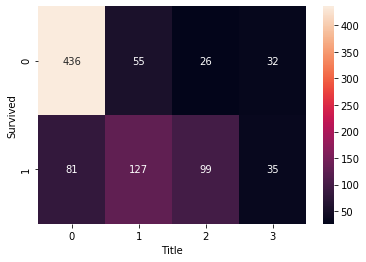

In [403]:
sns.heatmap(pd.crosstab(df_train['Survived'],df_train['Title']),annot=True,fmt='d')

#### sexe

In [404]:
def encodigingSexe(df):
    code = {"male": 0, 
            "female": 1}
    df['Sex'] = df['Sex'].map(sex_mapping)
    return df

encodigingSexe(df_test)
encodigingSexe(df_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0


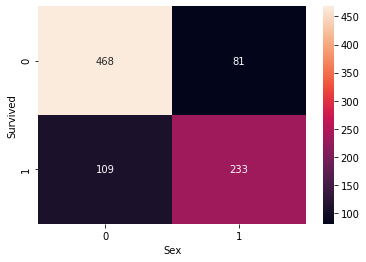

In [405]:
sns.heatmap(pd.crosstab(df_train['Survived'],df_train['Sex']),annot=True,fmt='d')

### Imputation des valeurs manquantes selon la variable clée Pclass

#### Age

In [406]:
df_train["Age"].fillna(df_train.groupby("Title")["Age"].transform("median"), inplace=True)
df_test["Age"].fillna(df_test.groupby("Title")["Age"].transform("median"), inplace=True)

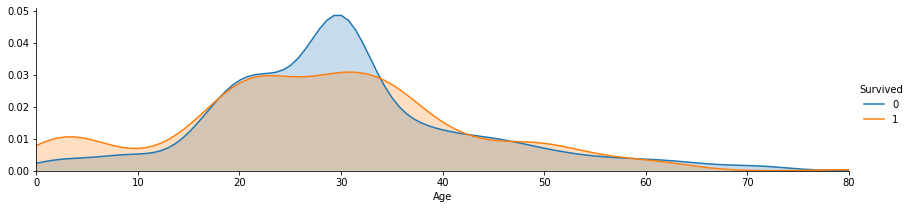

In [407]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.show() 

In [408]:
def encodigingAge(dataset):
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    return dataset

encodigingAge(df_test)
encodigingAge(df_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,1.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,C,0


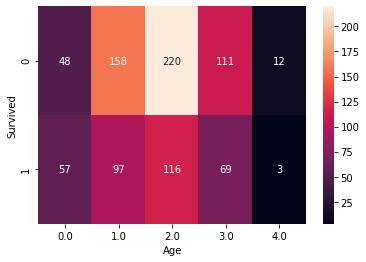

In [409]:
sns.heatmap(pd.crosstab(df_train['Survived'],df_train['Age']),annot=True,fmt='d')

##### Embarked

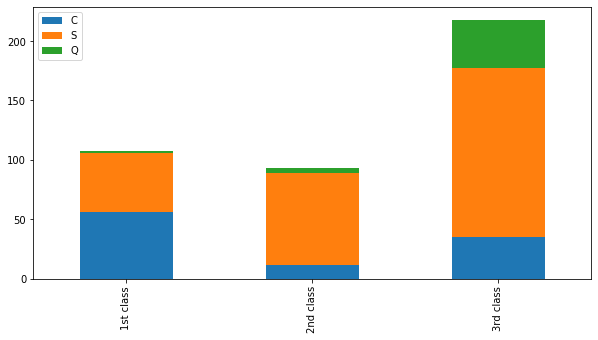

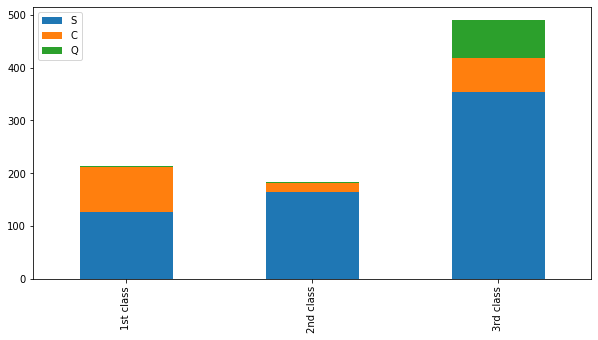

In [410]:
# Pour connaitre le dominant dans la colonne Embarked afin de remplir les valeurs manquantes
def ClasseEmbarked(df):
    Pclass1 = df[df['Pclass']==1]['Embarked'].value_counts()
    Pclass2 = df[df['Pclass']==2]['Embarked'].value_counts()
    Pclass3 = df[df['Pclass']==3]['Embarked'].value_counts()
    df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
    df.index = ['1st class','2nd class', '3rd class']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
ClasseEmbarked(df_test)    
ClasseEmbarked(df_train)

In [411]:
# le "S" est le plus dominant donc on remplace les NAN par les S
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].fillna('S')

In [412]:
def encodiging(df):
    code = {"S": 0, 
            "C": 1, 
            "Q": 2}
    df['Embarked'] = df['Embarked'].map(code)
    return df

encodiging(df_test)
encodiging(df_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,0,3
887,888,1,1,1,1.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,1,0


#### Fare

In [413]:
df_train["Fare"].fillna(df_train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

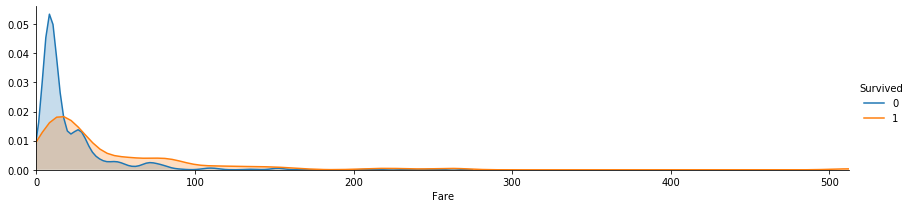

In [414]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
plt.show() 

In [415]:
def classeFare(dataset):
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3
    return dataset

classeFare(df_test)
classeFare(df_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,0.0,NaN,0,3
887,888,1,1,1,1.0,0,0,112053,1.0,B42,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,NaN,0,1
889,890,1,1,0,1.0,0,0,111369,1.0,C148,1,0


#### Cabin

In [416]:
df_train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F33            3
              ..
B37            1
C70            1
B71            1
E68            1
B39            1
Name: Cabin, Length: 147, dtype: int64

In [417]:
def extratCabin(df):
    df['Cabin'] = df['Cabin'].str[:1]
    return df

extratCabin(df_test)
extratCabin(df_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,0.0,NaN,0,3
887,888,1,1,1,1.0,0,0,112053,1.0,B,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,NaN,0,1
889,890,1,1,0,1.0,0,0,111369,1.0,C,1,0


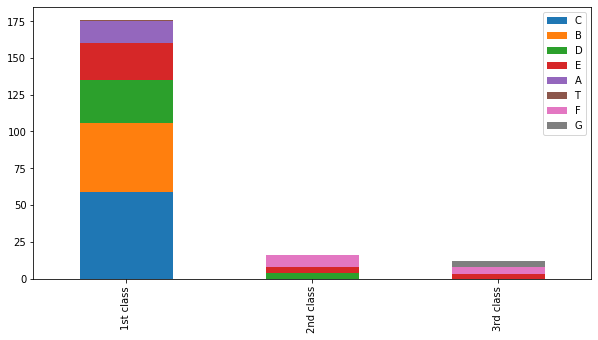

In [418]:
def classeCabin(df):
    Pclass1 = df[df['Pclass']==1]['Cabin'].value_counts()
    Pclass2 = df[df['Pclass']==2]['Cabin'].value_counts()
    Pclass3 = df[df['Pclass']==3]['Cabin'].value_counts()
    df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
    df.index = ['1st class','2nd class', '3rd class']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

classeCabin(df_train)

In [419]:
def encodigingCabin(df):
    code = {"A": 0, 
            "B": 0.4, 
            "C": 0.8, 
            "D": 1.2, 
            "E": 1.6, 
            "F": 2, 
            "G": 2.4, 
            "T": 2.8}
    df['Cabin'] = df['Cabin'].map(code)
    return df 

encodigingCabin(df_test)
encodigingCabin(df_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,0.0,NaN,0,3
887,888,1,1,1,1.0,0,0,112053,1.0,0.4,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,NaN,0,1
889,890,1,1,0,1.0,0,0,111369,1.0,0.8,1,0


In [420]:
df_train["Cabin"].fillna(df_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
df_test["Cabin"].fillna(df_test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

#### FamilySize

In [421]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

(0, 11.0)

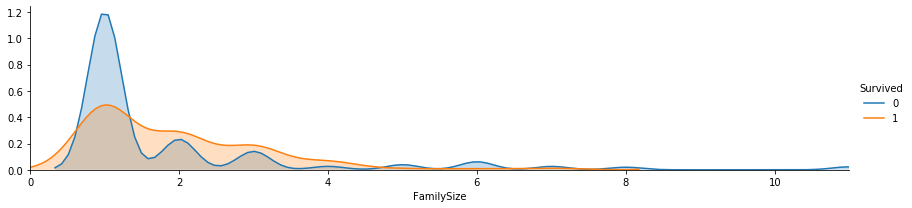

In [422]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, df_train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [423]:
def encodigingFamily(df):
    code = {1: 0,
            2: 0.4, 
            3: 0.8, 
            4: 1.2, 
            5: 1.6, 
            6: 2, 
            7: 2.4, 
            8: 2.8, 
            9: 3.2, 
            10: 3.6, 
            11: 4}
    df['FamilySize'] = df['FamilySize'].map(code)
    return df
    
encodigingFamily(df_test)
encodigingFamily(df_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,0.0,1.8,0,3,0.0
887,888,1,1,1,1.0,0,0,112053,1.0,0.4,0,1,0.0
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,2.0,0,1,1.2
889,890,1,1,0,1.0,0,0,111369,1.0,0.8,1,0,0.0


#### Drop des variables inutiles

In [424]:
variables_drop = ['Ticket', 'SibSp', 'Parch']

df_train = df_train.drop(variables_drop, axis=1)
df_test = df_test.drop(variables_drop, axis=1)

In [425]:
df_train = df_train.drop(['PassengerId'], axis=1)
#X_test = df_test.drop("PassengerId", axis=1).copy()

#trainset en Xtrain et Ytrain
X_train= df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

X_train.shape, y_train.shape

((891, 8), (891,))

In [387]:
X_train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [429]:
X_test = df_test.drop("PassengerId", axis=1).copy()
X_test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,0.0
1,3,1,3.0,0.0,2.0,0,2,0.4
2,2,0,3.0,0.0,2.0,2,0,0.0
3,3,0,2.0,0.0,2.0,0,0,0.0
4,3,1,1.0,0.0,2.0,0,2,0.8


## Modellisation

In [388]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

import numpy as np

#### Cross Validation (K-fold)

In [389]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### kNN

In [444]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

print("\nle score KNN moyenne est :" + str(round(np.mean(score)*100, 2)))


[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]

le score KNN moyenne est :82.6


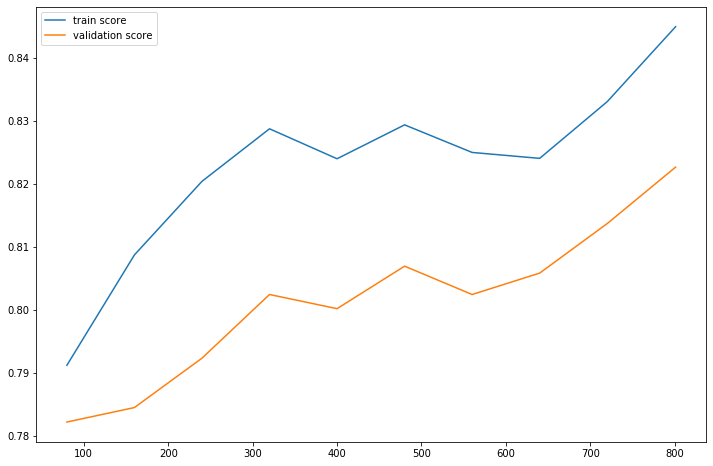

In [445]:
N, train_score, val_score = learning_curve(clf, X_train, y_train,cv=k_fold, scoring=scoring,train_sizes=np.linspace(0.1, 1, 10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

#### Decision Tree

In [446]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("\nle score Decision Tree moyenne est :" + str(round(np.mean(score)*100, 2)))

[0.76666667 0.83146067 0.7752809  0.7752809  0.86516854 0.76404494
 0.83146067 0.82022472 0.74157303 0.78651685]

le score Decision Tree moyenne est :79.58


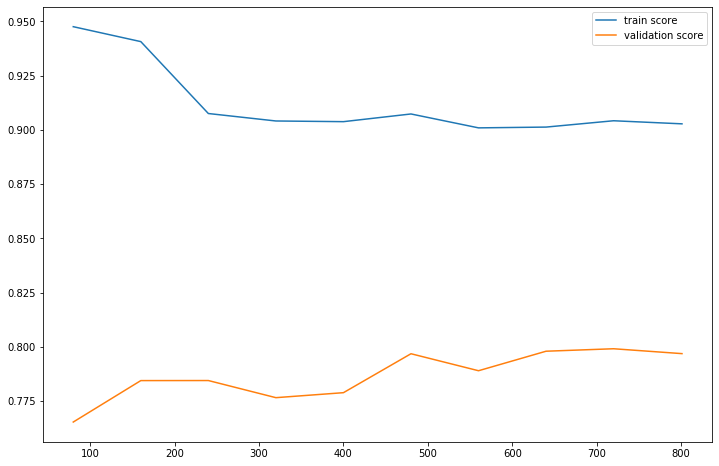

In [447]:
N, train_score, val_score = learning_curve(clf, X_train, y_train,cv=k_fold, scoring=scoring,train_sizes=np.linspace(0.1, 1, 10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

#### Ramdom Forest

In [448]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("\n le score Ramdom Forest moyenne est :" + str(round(np.mean(score)*100, 2)))

[0.77777778 0.83146067 0.79775281 0.7752809  0.83146067 0.80898876
 0.79775281 0.80898876 0.7752809  0.80898876]

 le score Ramdom Forest moyenne est :80.14


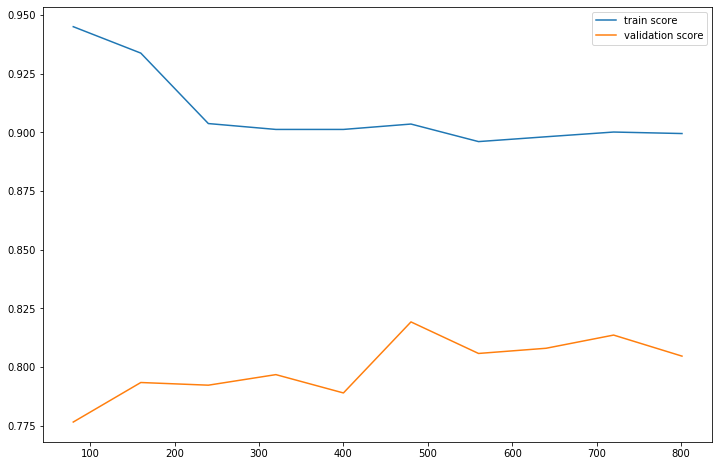

In [449]:
N, train_score, val_score = learning_curve(clf, X_train, y_train,cv=k_fold, scoring=scoring,train_sizes=np.linspace(0.1, 1, 10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

#### Naive Bayes

In [450]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("\n le score Naive Bayes moyenne est :" + str(round(np.mean(score)*100, 2)))

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]

 le score Naive Bayes moyenne est :78.78


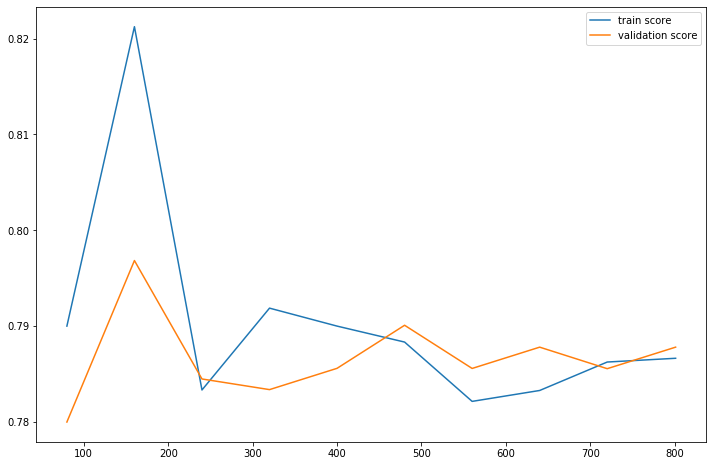

In [451]:
N, train_score, val_score = learning_curve(clf, X_train, y_train,cv=k_fold, scoring=scoring,train_sizes=np.linspace(0.1, 1, 10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

#### SVM

In [394]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("\n le score SVM moyenne est :" + str(round(np.mean(score)*100, 2)))

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]

 le score SVM moyenne est :83.5


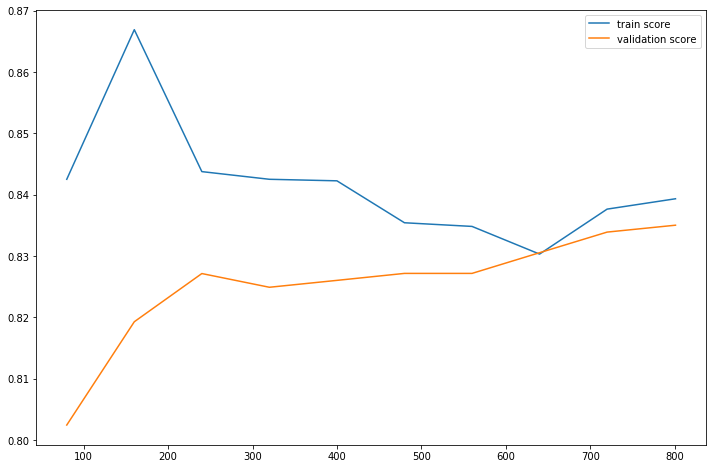

In [443]:
N, train_score, val_score = learning_curve(clf, X_train, y_train,cv=k_fold, scoring=scoring,train_sizes=np.linspace(0.1, 1, 10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

In [452]:
clf = SVC()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
ypred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [455]:
resultat = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": ypred
    })

resultat.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [457]:
resultat.to_csv('resultat.csv', index=False)